In [1]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

In [2]:
client_id='a5fbf573349d41f196ffeb3c440dfc3e'
client_secret='41ead63420ac46a184b37919d26b9532'
redirect_uri='http://localhost:8080'

In [3]:
username='sc6am5j26q8axwaau2qm4c1ye'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret) 
scope = 'user-library-read playlist-read-private'
try:
    token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)  
    sp=spotipy.Spotify(auth= token)
except:
    print('Token is not accesible for ' + username)

In [4]:
def getTrivialInfo(playlistList):
    dfTrivialList=[]
    for playlist in playlistList:
        index=0
        dfTrivial = pd.DataFrame(columns=('SongName', 'SongId', 'SongArtist'), index=np.arange(0, len(playlist['tracks']['items'])))
        for item in playlist['tracks']['items']:
            track = item['track']
            dfTrivial.loc[index]=[track['name'], track['id'], track['artists'][0]['name']]
            index+=1
        dfTrivialList.append(dfTrivial)
    return dfTrivialList

In [5]:
def getSongList(dfTrivialList):
    songIdsList=[]
    for dfTrivial in dfTrivialList:
        songIds=list(dfTrivial['SongId'])
        songIdsList.append(songIds)
    return songIdsList

In [6]:
def getFeaturesList(dfTrivialList, songIdsList, columns=('SongName', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness','Tempo')):
    dfFeaturesList=[]
    for dfTrivial, songIds in zip(dfTrivialList, songIdsList):
        index=0
        audioFeatures = sp.audio_features(tracks=songIds)
        categories=columns[1:]
        dfFeatures = pd.DataFrame(columns=columns, index=np.arange(0, len(songIds)))
        for i, song in enumerate(audioFeatures):
            dfFeatures.loc[index]=[list(dfTrivial['SongName'])[i], song['danceability'], song['energy'], song['loudness'], song['speechiness'], song['acousticness'], song['valence'], song['instrumentalness'], song['tempo']]
            index+=1
        dfFeaturesList.append(dfFeatures)
    return dfFeaturesList

In [7]:
def getFeaturesToUse(dfFeaturesList, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence']):
    featuresToUseList=[]
    for dfFeatures in dfFeaturesList:
        features = dfFeatures[categories]
        featuresToUseList.append(features)
    return featuresToUseList

In [8]:
def featurePreprocessing(song, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence']):
    return song[categories]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import operator

In [10]:
playlistDictionary={"Get Turnt": "37i9dQZF1DWY4xHQp97fN6",
                   "Classical Essentials": "37i9dQZF1DWWEJlAGA9gs0", #37i9dQZF1DXaXB8fQg7xif
                    "Rock Save the Queen" : "21NhxJs9i2OBgu8zREnx3G",
                   "Coffee Table Jazz" : "37i9dQZF1DWVqfgj8NZEp1"
                   }

In [11]:
getTurntId=playlistDictionary["Get Turnt"]
dancePartyId=playlistDictionary["Classical Essentials"]
jazzyRomanceId=playlistDictionary["Coffee Table Jazz"]
rockSaveTheQueenId=playlistDictionary["Rock Save the Queen"]
spotifyUsername='Spotify'
getTurnt=sp.user_playlist(spotifyUsername, playlist_id=getTurntId)
danceParty=sp.user_playlist(spotifyUsername, playlist_id=dancePartyId)
jazzyRomance=sp.user_playlist(spotifyUsername, playlist_id=jazzyRomanceId)
rockSaveTheQueen=sp.user_playlist(spotifyUsername, playlist_id=rockSaveTheQueenId)

In [36]:
getTurnt

{'collaborative': False,
 'description': 'Mood: Turnt',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWY4xHQp97fN6'},
 'followers': {'href': None, 'total': 6694548},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWY4xHQp97fN6?additional_types=track',
 'id': '37i9dQZF1DWY4xHQp97fN6',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f00000002237cfdc22f9a1ae1d8f79702',
   'width': None}],
 'name': 'Get Turnt',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#F49B23',
 'public': True,
 'snapshot_id': 'MTcxMTM4OTU4MiwwMDAwMDAwMGQzM2UxZTRlYWI1YjU1ZjE3YTFlYjg3ZmY3ZjRmNTlj',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWY4xHQp97fN6/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '

In [35]:
dfTrivialList

[                          SongName                  SongId  \
 0                         CARNIVAL  3w0w2T288dec0mgeZZqoNN   
 1                        Type Shit  28drn6tQo95MRvO0jQEo5C   
 2                           Bandit  7sTyAjxDXq9afwfSQy6D0s   
 3               Whatever She Wants  57wp7VFnV8X0pSVnYArGeJ   
 4                           redrum  52eIcoLUM25zbQupAZYoFh   
 ..                             ...                     ...   
 95       Tomorrow 2 (with Cardi B)  0WNfQxDGaPTl0yogcMR5v1   
 96              Aston Martin Truck  1KaRuTOGchQyTnrY3vWzfR   
 97  Shoot It Myself (feat. Future)  6Md6lyVVoKWcOaSg8u1tDn   
 98                            Walk  3wspfG772mi1c25JpnNOVP   
 99                    Vette Motors  0HrWshW3SuFJ6nKS9ba9Mh   
 
                     SongArtist  
 0                           ¥$  
 1                       Future  
 2                  Don Toliver  
 3                Bryson Tiller  
 4                    21 Savage  
 ..                         ...  
 95 

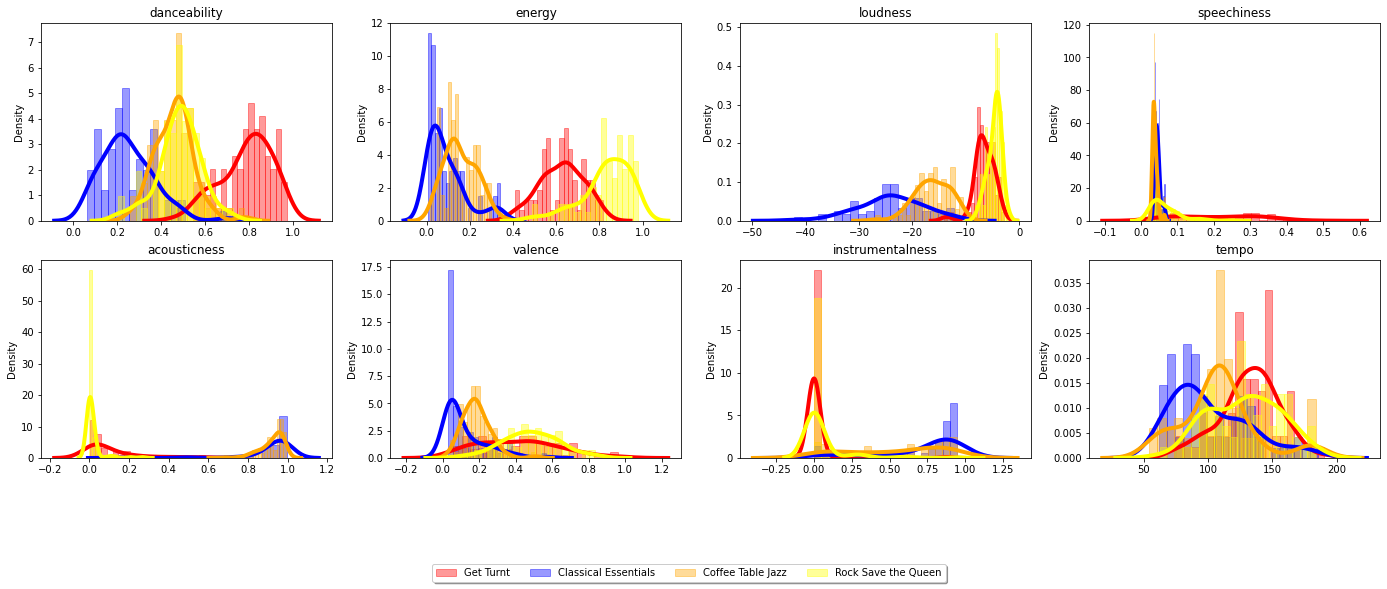

In [12]:
import warnings
warnings.filterwarnings("ignore")

column=('songName', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness','tempo')
playlistList=[getTurnt, danceParty, jazzyRomance, rockSaveTheQueen]
n_bins=20
fig, axs = plt.subplots(figsize=(24, 8), nrows=2, ncols=4)
axs=axs.flatten()
dfTrivialList=getTrivialInfo(playlistList)
songIdsList=getSongList(dfTrivialList)
songIds1=songIdsList[0]
songIds2=songIdsList[1]
songIds3=songIdsList[2]
songIds4=songIdsList[3]
audioFeatures1 = sp.audio_features(tracks=songIds1)
audioFeatures2 = sp.audio_features(tracks=songIds2)
audioFeatures3 = sp.audio_features(tracks=songIds3)
audioFeatures4 = sp.audio_features(tracks=songIds4)
for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    if song1 is None:
        audioFeatures1.remove(song1)
    if song2 is None:
        audioFeatures2.remove(song2)
    if song3 is None:
        audioFeatures3.remove(song3)
    if song4 is None:
        audioFeatures4.remove(song4)
            
index=0
for feature in column[1:]:
    ax=axs[index]
    ax.set_title(feature)
    featureListToPlot1 = []
    featureListToPlot2 = []
    featureListToPlot3 = []
    featureListToPlot4 = []
    for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
        featureListToPlot1.append(song1[feature])
        featureListToPlot2.append(song2[feature])
        featureListToPlot3.append(song3[feature])
        featureListToPlot4.append(song4[feature])
    sns.distplot(featureListToPlot1, hist=True, bins=n_bins, color = 'red', hist_kws={'edgecolor':'red'}, kde_kws={'linewidth': 4}, ax=ax,label='Get Turnt')
    sns.distplot(featureListToPlot2, hist=True, bins=n_bins, color = 'blue', hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4}, ax=ax,label='Classical Essentials')
    sns.distplot(featureListToPlot3, hist=True, bins=n_bins, color = 'orange', hist_kws={'edgecolor':'orange'}, kde_kws={'linewidth': 4}, ax=ax,label='Coffee Table Jazz')
    sns.distplot(featureListToPlot4, hist=True, bins=n_bins, color = 'yellow', hist_kws={'edgecolor':'yellow'}, kde_kws={'linewidth': 4}, ax=ax,label='Rock Save the Queen')
    index+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)

In [13]:
categories = column[1:]
tempoFeaturesTogether=[]
loudnessFeaturesTogether=[]

for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    tempoFeaturesTogether.append(song1['tempo'])
    tempoFeaturesTogether.append(song2['tempo'])
    tempoFeaturesTogether.append(song3['tempo'])
    tempoFeaturesTogether.append(song4['tempo'])
    loudnessFeaturesTogether.append(song1['loudness'])
    loudnessFeaturesTogether.append(song2['loudness'])
    loudnessFeaturesTogether.append(song3['loudness'])
    loudnessFeaturesTogether.append(song4['loudness'])
    
minimumTempo=min(tempoFeaturesTogether)
maximumTempo=max(tempoFeaturesTogether)
minimumLoudness=min(loudnessFeaturesTogether)
print(minimumLoudness)
maximumLoudness=max(loudnessFeaturesTogether)
print(maximumLoudness)

for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    song1['tempo']=(song1['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song2['tempo']=(song2['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song3['tempo']=(song3['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song4['tempo']=(song4['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song1['loudness']=(song1['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song2['loudness']=(song2['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song3['loudness']=(song3['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song4['loudness']=(song4['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)




dfFeaturesList=[]
audioFeaturesList=[audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4]
for audioFeatures in audioFeaturesList:
    dfFeatures = pd.DataFrame(columns=categories, index=np.arange(0, len(audioFeatures)))
    for i, song in enumerate(audioFeatures[:99]):
        print(song['loudness'])
        dfFeatures.loc[i]=[song['danceability'], song['energy'], song['loudness'], song['speechiness'], song['acousticness'], song['valence'], song['instrumentalness'], song['tempo']]
    
    dfFeaturesList.append(dfFeatures)

for i in range(len(dfFeaturesList)):
    dfFeaturesList[i]=dfFeaturesList[i].mean()

dfFeaturesList=pd.concat(dfFeaturesList, axis=1)

-42.238
-1.934
0.9054188169908692
0.9070811830091305
0.8099692338229455
0.8654227868201667
0.8384527590313616
0.8296695117109963
0.9372766971020244
0.8559448193727669
0.8530170702659786
0.8638100436681222
0.8549771734815403
0.695935887256848
0.8668122270742358
0.9778930131004365
0.8899861055974592
0.8629168320762206
0.7254366812227073
0.8804833267169512
0.883510321556173
0.9023670107185391
0.9343241365621276
0.8512802699483922
0.8861155220325525
0.8697647876141326
0.9350188566891624
0.8805825724493846
0.910207423580786
0.9214470027788804
0.9311482731242555
0.9159884874950377
0.9190899166335846
0.9174771734815402
0.9348451766574036
0.9608723699880903
0.8830885271933306
0.8830637157602222
0.9245236204843191
0.8947747121873759
0.8785976578007145
0.9103811036125447
0.8454247717348153
0.9071308058753473
0.9516921397379912
0.8750992457324334
0.9261363636363635
0.8453503374354902
0.8709557364033347
0.8651250496228662
0.9020940849543468
0.9224394601032154
0.8834606986899562
0.8623213576816197


[0.7845252525252523, 0.6186868686868685, -0.741659970085933, 0.22005151515151514, 0.1061515151515152, 0.41196161616161614, 0.010832043030303027, 29.766196420377682]
[0.24695858585858585, 0.09291565656565655, -4.712435001062631, 0.04386464646464648, 0.922242424242424, 0.12689999999999996, 0.7188043676767677, 20.79093237409591]
[0.45608080808080814, 0.15140101010101015, -3.27462074897446, 0.038578787878787886, 0.9088888888888885, 0.18375151515151514, 0.5491071656565657, 20.686538221067483]
[0.48397435897435886, 0.8348974358974363, 0.9333116392341284, 0.06590641025641022, 0.015505256153846151, 0.4820307692307693, 0.05192030564102565, 0.5471402716041698]


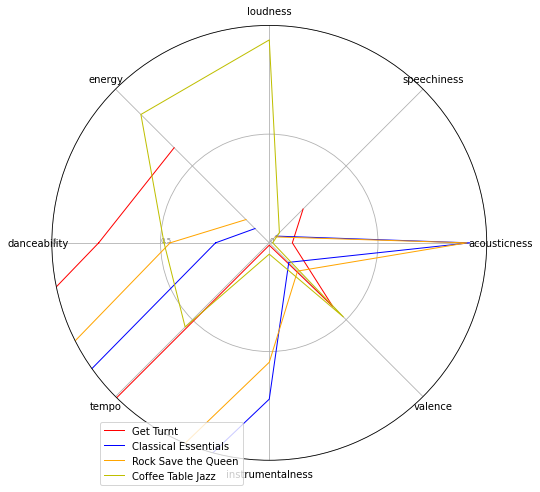

In [14]:
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:8], categories)

ax.set_rlabel_position(0)
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
plt.ylim(0, 1)
 

# Ind1
colors=['r', 'b', 'orange', 'y']
for i, key in enumerate(playlistDictionary.keys()):
    if i <4:
        values=list(dfFeaturesList[i])
        print(values)
        values += values[:1]
        ax.plot(angles, values, color=colors[i], linewidth=1, linestyle='solid', label=key)




plt.legend(bbox_to_anchor=(0.1, 0.1))

In [15]:
def euclideanDistance(data1, data2, weight, length):
    distance = 0
    for x in range(length):
        distance += np.square(weight[x]*(data1[x] - data2[x]))
    return np.sqrt(distance)

def distances(trainingSet, testSong, weight):
    distanceDict = {}
    length = testSong.shape[0]
    for genre, features in trainingSet.items():
        dist = [[euclideanDistance(features.iloc[x], testSong, weight, length), x] for x in range(len(features))]
        distanceDict[genre] = dist
    return distanceDict
def knn(sortedDistances, k):
    counter={}
    for key in sortedDistances.keys():
        counter[key] =0 
    minKey=''
    minId=0
    neighborKeyAndId=[]
    for i in range(k):
        minValue=5
        for key, value in sortedDistances.items():
            if value[0][0]<minValue:
                minId=value[0][1]
                minKey=key
                minValue = value[0][0]
        del(sortedDistances[minKey][0])
        counter[minKey]=counter[minKey]+1
        neighborKeyAndId.append([minKey, minId])
    return counter, neighborKeyAndId

In [16]:

playlistList=[getTurnt, danceParty, rockSaveTheQueen, jazzyRomance]

In [17]:
dfTrivialList=getTrivialInfo(playlistList);
songIdsList=getSongList(dfTrivialList);
dfFeaturesList=getFeaturesList(dfTrivialList, songIdsList, columns=('SongName', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness','Tempo'))
print(dfFeaturesList[1].iloc[48])
featuresToUseList=getFeaturesToUse(dfFeaturesList, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence','Instrumentalness'])
print(featuresToUseList[1])

SongName            Turandot, SC 91, Act III: Nessun dorma!
Danceability                                          0.212
Energy                                                0.301
Loudness                                            -12.505
Speechiness                                          0.0384
Acousticness                                          0.963
Valence                                              0.0798
Instrumentalness                                     0.0033
Tempo                                                84.025
Name: 48, dtype: object
   Danceability  Energy Speechiness Acousticness Valence Instrumentalness
0         0.275   0.157      0.0636         0.89   0.304            0.842
1         0.221   0.126      0.0447        0.989   0.216            0.897
2         0.289  0.0306      0.0446        0.987   0.118            0.911
3        0.0769  0.0846       0.045        0.922  0.0586            0.929
4         0.123    0.15       0.035        0.714  0.0904          

In [18]:
f1= featuresToUseList[0][:35]
f2= featuresToUseList[1][:35]
f3= featuresToUseList[2][:35]
f4= featuresToUseList[3][:35]
trainingSet = {'1': f1, '2': f2, '3': f3, '4': f4}
for i in range(len(featuresToUseList)):
    print(i)
    accurate=0
    total=0
    for j in range(len(featuresToUseList[i])):
        distanceList=distances(trainingSet, featuresToUseList[i].iloc[j], [1,1,1,1,1,1])
        #print(dfFeaturesList[i].iloc[j])
        sortedDict={}
        for key in distanceList.keys():
            sortedDict[key]=sorted(distanceList[key], key=operator.itemgetter(0))
        counter, neighborKeyAndId = knn(sortedDict, 25)
        prediction=max(counter.items(), key=operator.itemgetter(1))[0]
        if(i+1 == int(prediction)):
            accurate+=1
        total+=1
        #print(counter)
    print(float(accurate/total))

0
0.94
1
0.61
2
0.9743589743589743
3
0.89


In [20]:
#KNN
#0.93
#0.61
#0.97
#0.89



In [21]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return np.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [22]:
meanStdevPlaylist={}
index=0
for playlistFeatures in featuresToUseList[:4]:
    meanStdev=[]
    for column in ['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness']:
        featureColumns=list(playlistFeatures[column])
        meanStdev.append((mean(featureColumns), stdev(featureColumns)))
    meanStdevPlaylist[index]=meanStdev
    index=index+1
print(meanStdevPlaylist)

{0: [(0.7849799999999998, 0.11748844602553457), (0.6189399999999998, 0.10775625506229557), (0.221921, 0.11991295605268401), (0.10538800000000005, 0.13222420564932866), (0.410112, 0.22133595620935856), (0.010723722599999996, 0.08865974920129109)], 1: [(0.24931899999999999, 0.12354324944665485), (0.09390649999999999, 0.08699720343090335), (0.04389500000000002, 0.008537929337593357), (0.9229299999999998, 0.11673472084390767), (0.12617299999999998, 0.13415608191260436), (0.720696324, 0.27759165923374945)], 2: [(0.48397435897435886, 0.09700220567300472), (0.8348974358974363, 0.11068084334811099), (0.06590641025641022, 0.04095493988802939), (0.015505256153846151, 0.04246874023247395), (0.4820307692307693, 0.15291165797562703), (0.05192030564102565, 0.15617586990764298)], 3: [(0.4564000000000001, 0.09021970937437097), (0.15041400000000002, 0.07064860120713823), (0.03867100000000001, 0.007018867717830566), (0.9095099999999996, 0.10039693896496721), (0.183844, 0.08426209390162856), (0.552726094

In [23]:
def calculateProbability(x, mean, stdev):
    exponent = np.exp(-(np.square(x-mean)/(2*np.square(stdev))))
    return exponent / (np.sqrt(2*pi) * stdev) 

In [24]:
def calculateProbabilityAllFeatures(song, meanStdevPlaylist):
    probabilities={}
    for key, value in meanStdevPlaylist.items():
        probabilities[key] = [calculateProbability(song[i], val[0], val[1]) for i, val in enumerate(value)]
    return probabilities

In [25]:
probabilities = calculateProbabilityAllFeatures(featuresToUseList[0].iloc[44], meanStdevPlaylist)
print(probabilities)
for key, value in probabilities.items():
    probability = 1
    for val in value:
        probability*=val 
    probabilities[key] = probability
print(probabilities)

{0: [1.3743579621376891, 3.1551300038993713, 1.289141202661934, 2.2303545579635284, 1.218352855619174, 4.4669186761445525], 1: [4.6037012615239787e-07, 3.0330902530640233e-06, 14.9094658866788, 1.0878818776409428e-13, 0.0049600616130582404, 0.04941202648383683], 2: [5.6437567808180033e-05, 0.1576705514422653, 9.50315756259832, 8.969930895486625, 1.8782101302746876, 2.417122864796619], 3: [2.132208758294462e-06, 3.3446177905648496e-07, 2.022917812737861, 7.587273509677475e-18, 1.6779739930617143e-05, 0.292055558428239]}
{0: 67.85356185330338, 1: 5.550805783785412e-28, 2: 0.003443648441644494, 3: 5.364026301022728e-35}


In [26]:
for i in range(len(featuresToUseList[:4])):
    print(i)
    accurate=0
    total=0
    for j in range(len(featuresToUseList[i])):
        probabilities = calculateProbabilityAllFeatures(featuresToUseList[i].iloc[j], meanStdevPlaylist)
        print(dfFeaturesList[i].iloc[j].SongName)
        for key, value in probabilities.items():
            
            probability = 1
            for val in value:
                probability*=val 
            probabilities[key] = probability
        print(probabilities)
        prediction=max(probabilities.items(), key=operator.itemgetter(1))[0]
        if(i == int(prediction)):
            accurate+=1
        else:
            print("\n")
        total+=1
    print(float(accurate/total))

0
CARNIVAL
{0: 35.73771244678039, 1: 4.306980927719299e-63, 2: 0.04217513803874841, 3: 7.99996800093257e-92}
Type Shit
{0: 95.65665075385888, 1: 6.642026363507564e-41, 2: 1.44699549418614, 3: 7.341580135849755e-58}
Bandit
{0: 105.67609833107103, 1: 5.542130062320475e-30, 2: 6.874829309145095, 3: 1.2305195630294572e-39}
Whatever She Wants
{0: 263.10865282547854, 1: 3.6102849976097734e-27, 2: 0.013791413615307358, 3: 1.2134028873119156e-35}
redrum
{0: 42.18668217082786, 1: 8.387542242786477e-26, 2: 561.3995775861463, 3: 7.867010833715789e-31}


Mmhmm
{0: 9.943952954287873, 1: 1.9509469495464965e-281, 2: 4.684193929626564e-13, 3: 0.0}
Prada Dem (feat. Offset)
{0: 130.45054451505982, 1: 1.0372199191143189e-29, 2: 0.01966938991180935, 3: 9.899058782817602e-39}
Cinderella
{0: 1.3554867554846168, 1: 2.1990202101260606e-13, 2: 2.491456688307815e-25, 3: 3.1378484814866216e-15}
Never Lose Me
{0: 155.85872991424793, 1: 2.0238371085068145e-29, 2: 0.061859569379161136, 3: 7.730947050607826e-39}
Ben

In [41]:
teams_list = ["Get Turnt", "Classical Essentials", "Rock Save The Queen", "Coffee Table Jazz"]
data = np.array([[0.93, 0.95],
                 [0.61, 0.88],
                 [0.97, 0.96],
                 [0.89, 0.89]])
pd.DataFrame(data, teams_list, ["KNN", "NBC"])

,KNN,NBC
Get Turnt,0.93,0.95
Classical Essentials,0.61,0.88
Rock Save The Queen,0.97,0.96
Coffee Table Jazz,0.89,0.89


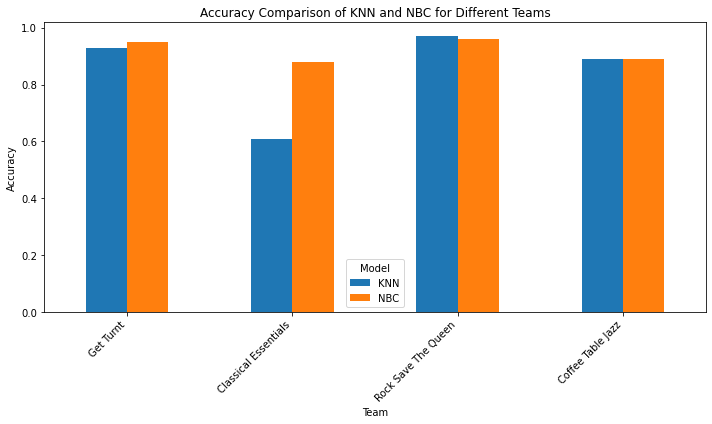

In [42]:
df = pd.DataFrame(data, teams_list, ["KNN", "NBC"])

# Plotting
df.plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison of KNN and NBC for Different Teams')
plt.xlabel('Team')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [37]:
f1.head()

,Danceability,Energy,Speechiness,Acousticness,Valence,Instrumentalness
0,0.594,0.811,0.159,0.189,0.311,0
1,0.64,0.552,0.129,0.0215,0.112,0
2,0.671,0.615,0.0955,0.00113,0.109,0.000001
3,0.82,0.487,0.0959,0.102,0.431,0
4,0.624,0.74,0.0481,0.00529,0.246,0.000224


In [30]:
f2

,Danceability,Energy,Speechiness,Acousticness,Valence,Instrumentalness
0,0.275,0.157,0.0636,0.89,0.304,0.842
1,0.221,0.126,0.0447,0.989,0.216,0.897
2,0.289,0.0306,0.0446,0.987,0.118,0.911
3,0.0769,0.0846,0.045,0.922,0.0586,0.929
4,0.123,0.15,0.035,0.714,0.0904,0.913
5,0.0939,0.0336,0.0606,0.927,0.0516,0.83
6,0.376,0.00579,0.0576,0.996,0.0369,0.944
7,0.169,0.0161,0.0442,0.986,0.0573,0.86
8,0.335,0.00501,0.0451,0.993,0.0383,0.919
9,0.2,0.0686,0.046,0.873,0.0358,0.402


In [31]:
f3

,Danceability,Energy,Speechiness,Acousticness,Valence,Instrumentalness
0,0.428,0.673,0.159,0.00277,0.461,0
1,0.414,0.896,0.085,0.000277,0.498,0.000083
2,0.531,0.847,0.0529,0.00743,0.38,0
3,0.689,0.617,0.0289,0.0918,0.682,0.00002
4,0.427,0.813,0.0708,0.000682,0.434,0.279
5,0.531,0.711,0.0398,0.000204,0.279,0.00291
6,0.217,0.785,0.0494,0.0245,0.199,0
7,0.516,0.842,0.0972,0.00032,0.39,0
8,0.556,0.884,0.0362,0.0136,0.67,0
9,0.602,0.81,0.0272,0.000151,0.509,0.00063


In [32]:
f4

,Danceability,Energy,Speechiness,Acousticness,Valence,Instrumentalness
0,0.505,0.271,0.0367,0.926,0.203,0.866
1,0.387,0.118,0.0421,0.964,0.206,0.906
2,0.495,0.183,0.034,0.973,0.211,0.74
3,0.421,0.0993,0.0367,0.978,0.188,0.507
4,0.492,0.1,0.0395,0.988,0.153,0.831
5,0.492,0.245,0.036,0.89,0.0613,0.868
6,0.515,0.0631,0.0321,0.948,0.293,0.257
7,0.362,0.0542,0.0493,0.965,0.196,0.000759
8,0.278,0.126,0.0342,0.965,0.241,0.912
9,0.481,0.126,0.0428,0.788,0.12,0.202


In [102]:
featuresToUseList

[   Danceability Energy Speechiness Acousticness Valence Instrumentalness
 0         0.915  0.596      0.0729       0.0445    0.64                0
 1          0.82  0.487      0.0959        0.102   0.431                0
 2         0.594  0.811       0.159        0.189   0.311                0
 3         0.624   0.74      0.0481      0.00529   0.246         0.000224
 4         0.812  0.537      0.0934       0.0389   0.274         0.000005
 ..          ...    ...         ...          ...     ...              ...
 95        0.795  0.814         0.4       0.0736    0.68                0
 96        0.749  0.548       0.352        0.194   0.581                0
 97        0.798  0.471       0.125      0.00189    0.11                0
 98        0.817  0.512      0.0984        0.037    0.17                0
 99         0.83  0.644       0.407       0.0298   0.227                0
 
 [100 rows x 6 columns],
    Danceability  Energy Speechiness Acousticness Valence Instrumentalness
 0        

In [38]:
featuresToUseList[0][35:]

,Danceability,Energy,Speechiness,Acousticness,Valence,Instrumentalness
35,0.967,0.545,0.207,0.0403,0.311,0.000195
36,0.92,0.703,0.357,0.00518,0.853,0
37,0.852,0.625,0.151,0.0317,0.369,0.0174
38,0.835,0.639,0.364,0.295,0.926,0
39,0.736,0.769,0.258,0.027,0.388,0
...,...,...,...,...,...,...
95,0.795,0.814,0.4,0.0736,0.68,0
96,0.749,0.548,0.352,0.194,0.581,0
97,0.798,0.471,0.125,0.00189,0.11,0
98,0.817,0.512,0.0984,0.037,0.17,0


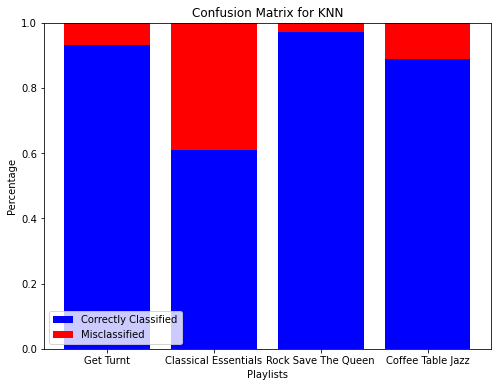

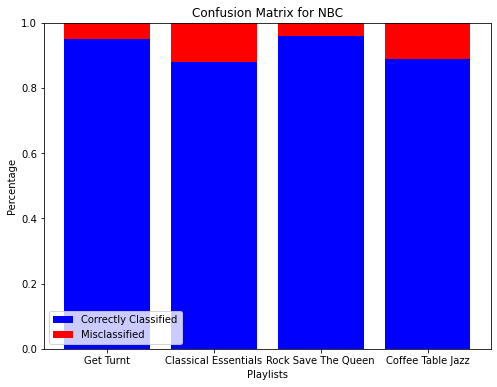

In [43]:
accuracy_scores = {
    "Get Turnt": {"KNN": 0.93, "NBC": 0.95},
    "Classical Essentials": {"KNN": 0.61, "NBC": 0.88},
    "Rock Save The Queen": {"KNN": 0.97, "NBC": 0.96},
    "Coffee Table Jazz": {"KNN": 0.89, "NBC": 0.89}
}


def plot_confusion_matrix(accuracy_scores, classifier):
    plt.figure(figsize=(8, 6))
    genres = list(accuracy_scores.keys())
    accuracy = [accuracy_scores[genre][classifier] for genre in genres]
    misclassification = [1 - acc for acc in accuracy]

    plt.bar(genres, accuracy, color='b', label='Correctly Classified')
    plt.bar(genres, misclassification, bottom=accuracy, color='r', label='Misclassified')
    plt.xlabel('Playlists')
    plt.ylabel('Percentage')
    plt.title(f'Confusion Matrix for {classifier}')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()


plot_confusion_matrix(accuracy_scores, 'KNN')


plot_confusion_matrix(accuracy_scores, 'NBC')

In [40]:
featuresToUseList

[   Danceability Energy Speechiness Acousticness Valence Instrumentalness
 0         0.594  0.811       0.159        0.189   0.311                0
 1          0.64  0.552       0.129       0.0215   0.112                0
 2         0.671  0.615      0.0955      0.00113   0.109         0.000001
 3          0.82  0.487      0.0959        0.102   0.431                0
 4         0.624   0.74      0.0481      0.00529   0.246         0.000224
 ..          ...    ...         ...          ...     ...              ...
 95        0.795  0.814         0.4       0.0736    0.68                0
 96        0.749  0.548       0.352        0.194   0.581                0
 97        0.798  0.471       0.125      0.00189    0.11                0
 98        0.817  0.512      0.0984        0.037    0.17                0
 99         0.83  0.644       0.407       0.0298   0.227                0
 
 [100 rows x 6 columns],
    Danceability  Energy Speechiness Acousticness Valence Instrumentalness
 0        

In [44]:
import numpy as np

accuracy_scores = {
    "Get Turnt": {"KNN": 0.93, "NBC": 0.95},
    "Classical Essentials": {"KNN": 0.61, "NBC": 0.88},
    "Rock Save The Queen": {"KNN": 0.97, "NBC": 0.96},
    "Coffee Table Jazz": {"KNN": 0.89, "NBC": 0.89}
}

num_songs = {
    "Get Turnt": 100,
    "Classical Essentials": 100,
    "Rock Save The Queen": 78,
    "Coffee Table Jazz": 100
}


def calculate_confusion_matrix(accuracy_scores, num_songs):
    confusion_matrices = {}
    for playlist, scores in accuracy_scores.items():

        total_songs = num_songs[playlist]
        correctly_classified = {classifier: score * total_songs for classifier, score in scores.items()}
        misclassified = {classifier: total_songs - correct for classifier, correct in correctly_classified.items()}
        confusion_matrices[playlist] = np.array([[correctly_classified["KNN"], misclassified["KNN"]],
                                                 [correctly_classified["NBC"], misclassified["NBC"]]])
    return confusion_matrices


confusion_matrices = calculate_confusion_matrix(accuracy_scores, num_songs)


for playlist, matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {playlist}:")
    print(matrix)
    print()


Confusion Matrix for Get Turnt:
[[93.  7.]
 [95.  5.]]

Confusion Matrix for Classical Essentials:
[[61. 39.]
 [88. 12.]]

Confusion Matrix for Rock Save The Queen:
[[75.66  2.34]
 [74.88  3.12]]

Confusion Matrix for Coffee Table Jazz:
[[89. 11.]
 [89. 11.]]



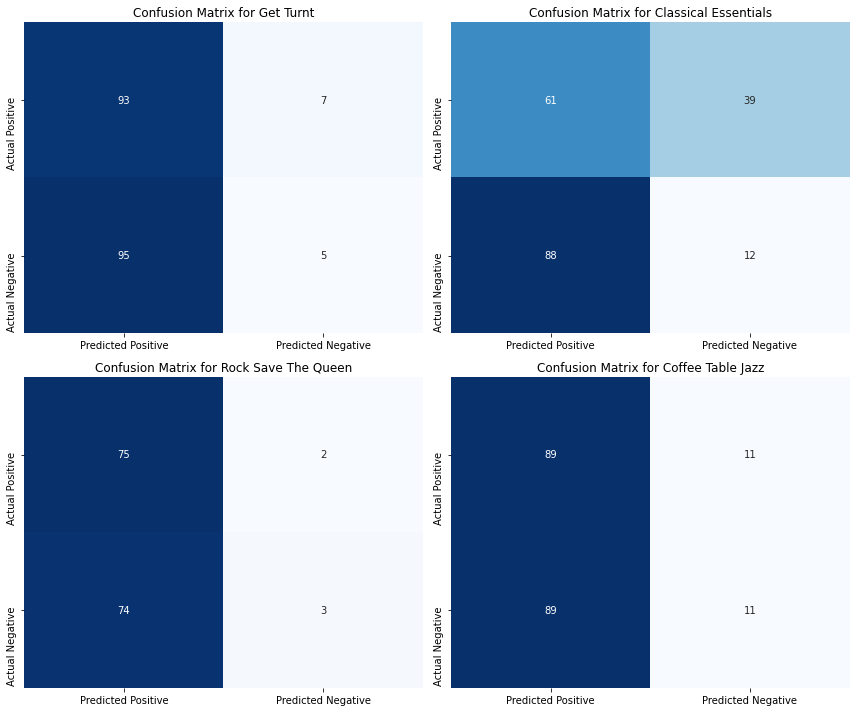

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize confusion matrix
def visualize_confusion_matrix(confusion_matrices):
    plt.figure(figsize=(12, 10))
    for i, (playlist, matrix) in enumerate(confusion_matrices.items(), start=1):
        plt.subplot(2, 2, i)
        # Convert float values to integers
        matrix = matrix.astype(int)
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted Positive', 'Predicted Negative'],
                    yticklabels=['Actual Positive', 'Actual Negative'])
        plt.title(f'Confusion Matrix for {playlist}')
    plt.tight_layout()
    plt.show()

# Visualize confusion matrices
visualize_confusion_matrix(confusion_matrices)
